In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/benjamin/Masterphase/Mastercode


In [ ]:
from helper.helper import TSNE_plots, nn_offset_training, t_dependence_plot
plt.rcParams['figure.figsize'] = (15.0, 10.0)

# How much training data does the NN need close to the phase transition?

In [6]:
from Ising.Data import IsingData
data = IsingData("Ising/large_dataset")

Loading training data
Loading test data


## Visualize high-dimensional configuration space

PCA completed


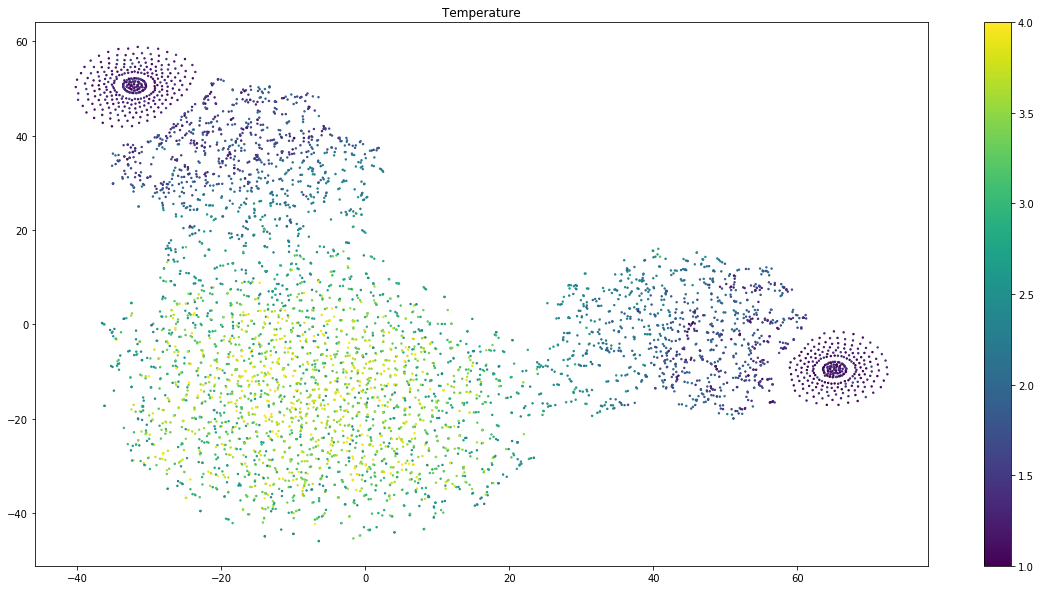

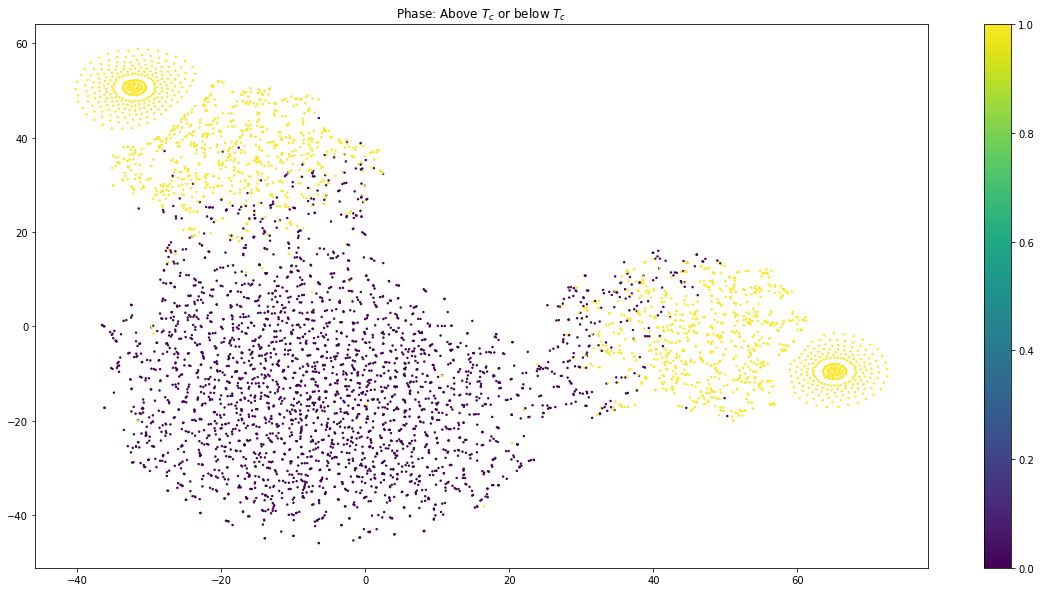

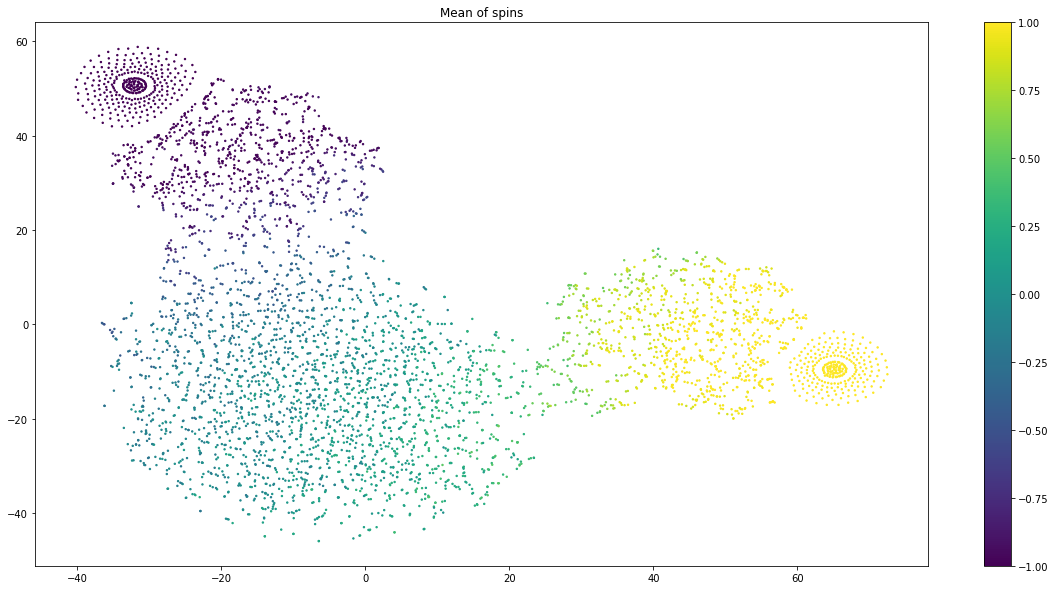

In [7]:
train_embedded = TSNE_plots(data.get_batch(5000), dim_PCA=20)

## Train different NN architectures on all states vs high and low limit only

In [8]:
results, nns = nn_offset_training(data.train_data, nn="Simple")

CURRENT OFFSET IS 0.0
Training 40 epochs took 18.09s
Accuracy is 0.9599999785423279
CURRENT OFFSET IS 0.1
Training 40 epochs took 17.147s
Accuracy is 0.9599999785423279
CURRENT OFFSET IS 0.2
Training 40 epochs took 14.316s
Accuracy is 0.9599999785423279
CURRENT OFFSET IS 0.30000000000000004
Training 40 epochs took 12.961s
Accuracy is 0.949999988079071
CURRENT OFFSET IS 0.4
Training 40 epochs took 11.473s
Accuracy is 0.949999988079071
CURRENT OFFSET IS 0.5
Training 40 epochs took 11.089s
Accuracy is 0.9300000071525574
CURRENT OFFSET IS 0.6000000000000001
Training 40 epochs took 10.191s
Accuracy is 0.9200000166893005
CURRENT OFFSET IS 0.7000000000000001
Training 40 epochs took 8.823s
Accuracy is 0.9300000071525574
CURRENT OFFSET IS 0.8
Training 40 epochs took 8.727s
Accuracy is 0.9200000166893005
CURRENT OFFSET IS 0.9
Training 40 epochs took 6.769s
Accuracy is 0.8999999761581421
CURRENT OFFSET IS 1.0
Training 40 epochs took 5.577s
Accuracy is 0.8999999761581421
CURRENT OFFSET IS 1.1
Trai

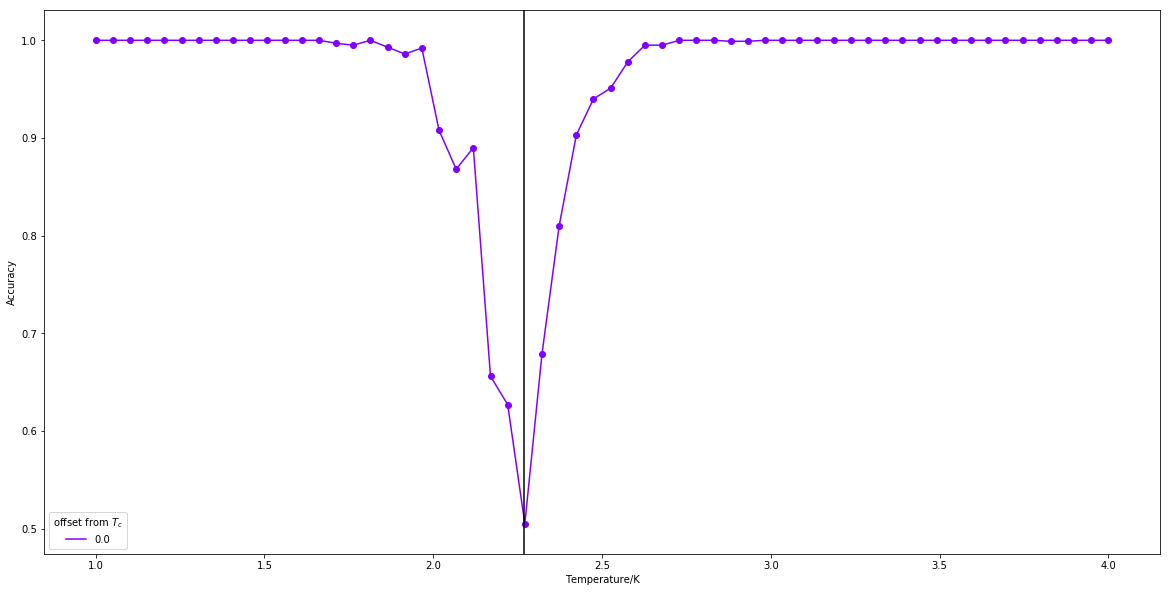

In [9]:
t_dependence_plot(results[0:1])

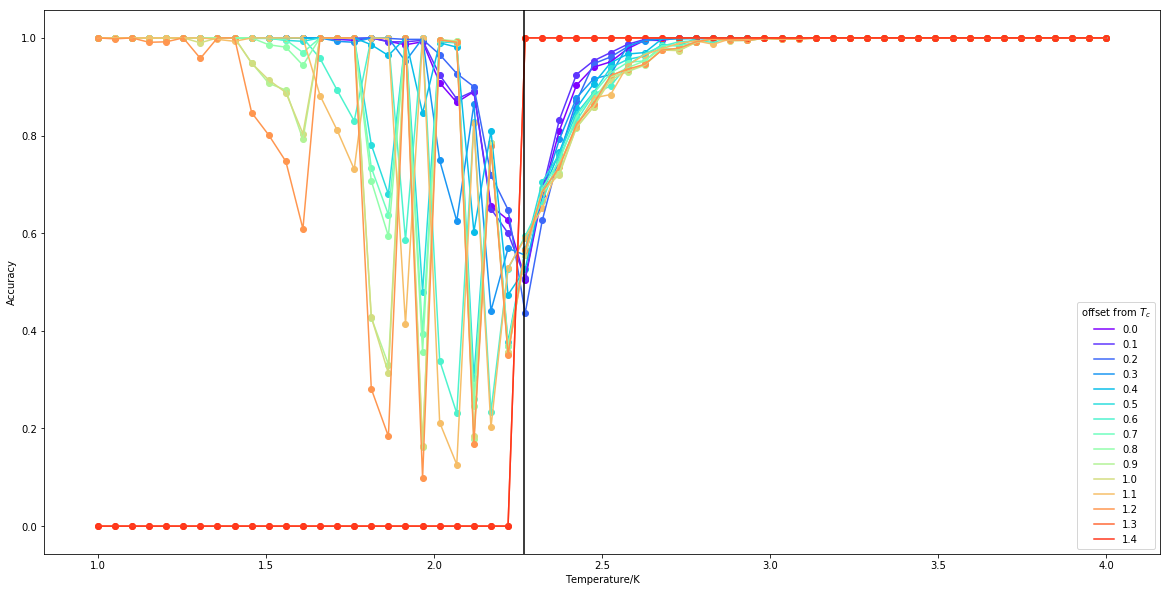

In [10]:
t_dependence_plot(results)

The SimpleNN fails to identify low temperature states properly. This is probably due to the fact that this requires non-local knowledge (ferromagnetic regions). Though still strange that the effect is extreme for some temperatures.

In [11]:
presults, pnns = nn_offset_training(data.train_data, nn="Paper")

CURRENT OFFSET IS 0.0
After 20.221s of training (epoch 35/40)
Accuracy is 0.9599999785423279
Training 40 epochs took 23.0s
Accuracy is 0.9700000286102295
CURRENT OFFSET IS 0.1
Training 40 epochs took 19.897s
Accuracy is 0.9700000286102295
CURRENT OFFSET IS 0.2
Training 40 epochs took 18.755s
Accuracy is 0.9599999785423279
CURRENT OFFSET IS 0.30000000000000004
Training 40 epochs took 14.82s
Accuracy is 0.9599999785423279
CURRENT OFFSET IS 0.4
Training 40 epochs took 16.532s
Accuracy is 0.9599999785423279
CURRENT OFFSET IS 0.5
Training 40 epochs took 16.52s
Accuracy is 0.9599999785423279
CURRENT OFFSET IS 0.6000000000000001
Training 40 epochs took 13.842s
Accuracy is 0.9599999785423279
CURRENT OFFSET IS 0.7000000000000001
Training 40 epochs took 11.969s
Accuracy is 0.949999988079071
CURRENT OFFSET IS 0.8
Training 40 epochs took 8.39s
Accuracy is 0.9599999785423279
CURRENT OFFSET IS 0.9
Training 40 epochs took 8.619s
Accuracy is 0.949999988079071
CURRENT OFFSET IS 1.0
Training 40 epochs t

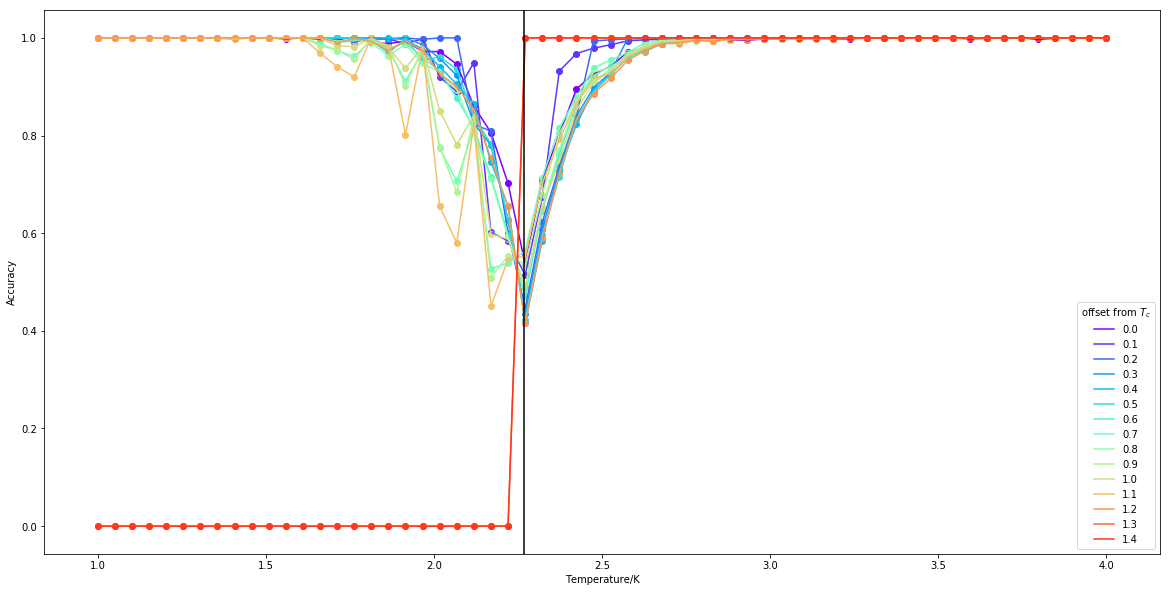

In [12]:
t_dependence_plot(presults) 

In [13]:
# I need this since I only have 8 GB GDDR5 ram on my graphics card
del nns
del pnns

In [14]:
coffsets = 0.2*np.arange(5)
cresults, cnns = nn_offset_training(data.train_data, nn="Conv", offsets=coffsets)

CURRENT OFFSET IS 0.0
After 20.865s of training (epoch 11/40)
Accuracy is 0.9700000286102295
After 42.353s of training (epoch 24/40)
Accuracy is 0.5799999833106995
After 63.557s of training (epoch 37/40)
Accuracy is 0.5799999833106995
Training 40 epochs took 68.762s
Accuracy is 0.5799999833106995
CURRENT OFFSET IS 0.2
After 21.491s of training (epoch 14/40)
Accuracy is 0.5799999833106995
After 41.994s of training (epoch 28/40)
Accuracy is 0.5799999833106995
Training 40 epochs took 59.323s
Accuracy is 0.5799999833106995
CURRENT OFFSET IS 0.4
After 20.796s of training (epoch 20/40)
Accuracy is 0.9599999785423279
After 41.725s of training (epoch 40/40)
Training 40 epochs took 41.725s
Accuracy is 0.9599999785423279
CURRENT OFFSET IS 0.6000000000000001
After 20.741s of training (epoch 20/40)
Accuracy is 0.949999988079071
After 41.273s of training (epoch 39/40)
Accuracy is 0.949999988079071
Training 40 epochs took 42.774s
Accuracy is 0.949999988079071
CURRENT OFFSET IS 0.8
After 20.665s of t

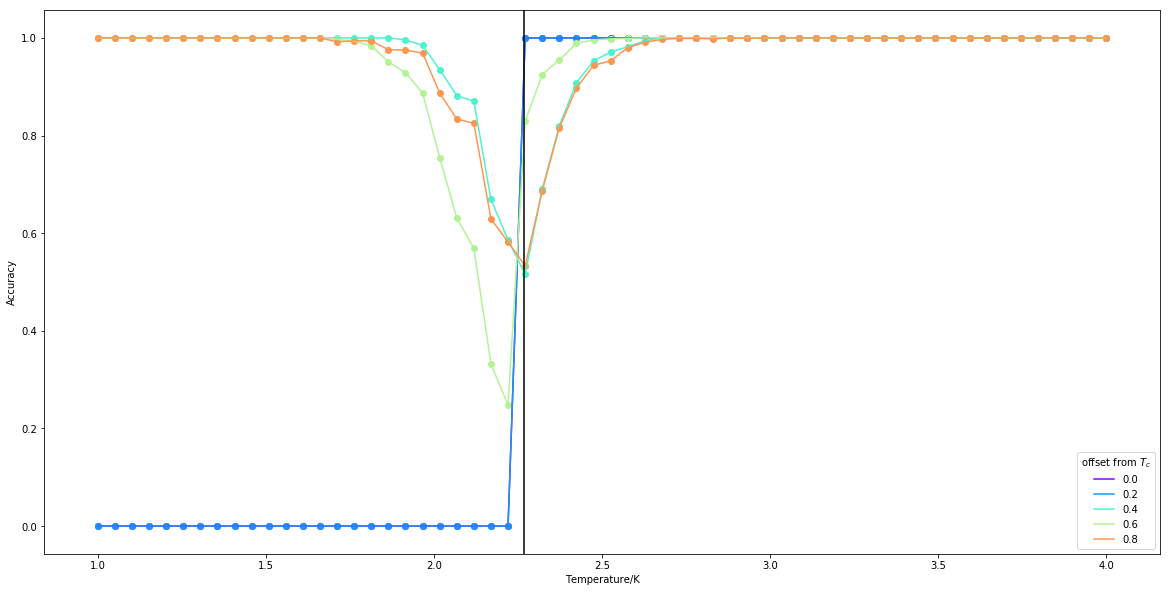

In [15]:
t_dependence_plot(cresults, offsets=0.2*np.arange(5))

Don't understand why this network fails for very low offset and resolves to always guess the most likely class, maybe dropout and balancing classes can help to leave this local minimum of the loss function.